<a href="https://colab.research.google.com/github/SujayVivek/QuantAIVerse/blob/Quanta-1/QuantAIVerse_House_Price_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn import metrics
import seaborn as sns
%matplotlib inline

In [2]:
data_url = "https://archive.ics.uci.edu/ml/machine-learning-databases/housing/housing.data"
raw_df = pd.read_csv(data_url, sep="\s+", skiprows=22, header = None)
# data = np.hstack([raw_df.values[::2, :], raw_df.values[1::2, :2]])
# target = raw_df.values[1::2, 2]

In [3]:
raw_df.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13
0,1.23247,0.0,8.14,0,0.538,6.142,91.7,3.9769,4,307.0,21.0,396.90,18.72,15.2
1,0.98843,0.0,8.14,0,0.538,5.813,100.0,4.0952,4,307.0,21.0,394.54,19.88,14.5
2,0.75026,0.0,8.14,0,0.538,5.924,94.1,4.3996,4,307.0,21.0,394.33,16.30,15.6
3,0.84054,0.0,8.14,0,0.538,5.599,85.7,4.4546,4,307.0,21.0,303.42,16.51,13.9
4,0.67191,0.0,8.14,0,0.538,5.813,90.3,4.6820,4,307.0,21.0,376.88,14.81,16.6


In [4]:
raw_df.columns = ['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX', 'PTRATIO', 'B', 'LSTAT', 'PRICE']
raw_df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,PRICE
0,1.23247,0.0,8.14,0,0.538,6.142,91.7,3.9769,4,307.0,21.0,396.90,18.72,15.2
1,0.98843,0.0,8.14,0,0.538,5.813,100.0,4.0952,4,307.0,21.0,394.54,19.88,14.5
2,0.75026,0.0,8.14,0,0.538,5.924,94.1,4.3996,4,307.0,21.0,394.33,16.30,15.6
3,0.84054,0.0,8.14,0,0.538,5.599,85.7,4.4546,4,307.0,21.0,303.42,16.51,13.9
4,0.67191,0.0,8.14,0,0.538,5.813,90.3,4.6820,4,307.0,21.0,376.88,14.81,16.6


In [5]:
#setting up the target variable
target = raw_df['PRICE']


In [ ]:
raw_df.shape

(484, 14)

In [ ]:
raw_df.nunique()

CRIM       482
ZN          25
INDUS       73
CHAS         2
NOX         78
RM         429
AGE        343
DIS        395
RAD          9
TAX         64
PTRATIO     46
B          344
LSTAT      437
PRICE      228
dtype: int64

In [ ]:
#check for isNull
raw_df.isna().sum()

CRIM       0
ZN         0
INDUS      0
CHAS       0
NOX        0
RM         0
AGE        0
DIS        0
RAD        0
TAX        0
PTRATIO    0
B          0
LSTAT      0
PRICE      0
dtype: int64

In [ ]:
#No Null data
#to check for rows with missing values
raw_df[raw_df.isnull().any(axis=1)]

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,PRICE


In [ ]:
corr = raw_df.corr()


<Axes: >

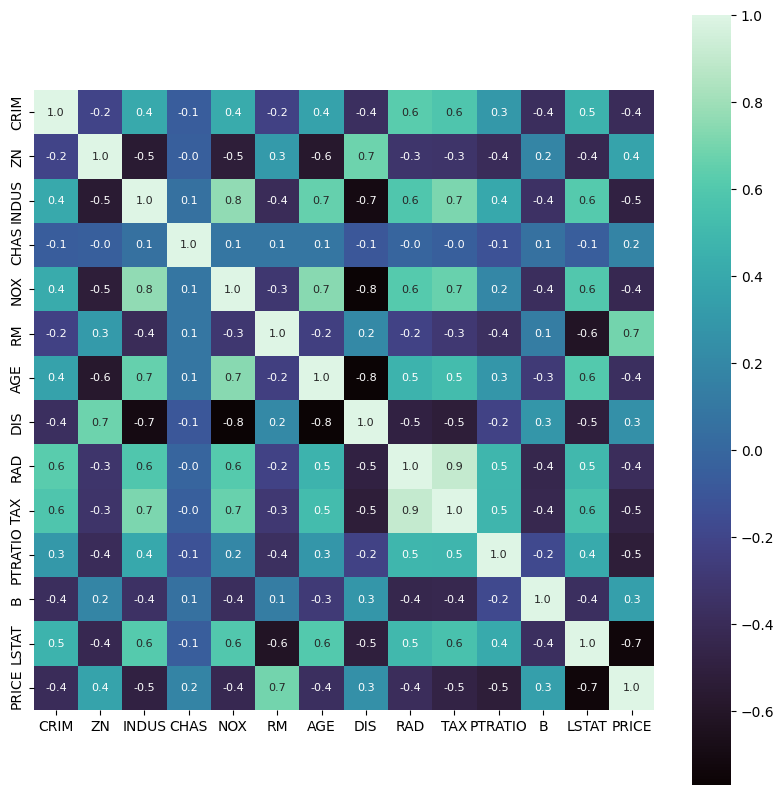

In [ ]:
plt.figure(figsize=(10,10))
sns.heatmap(corr, annot=True, cbar= True, cmap='mako', fmt='.1f', annot_kws={'size':8}, square=True)

In [6]:
Y = raw_df['PRICE']
X = raw_df.drop('PRICE', axis=1)

In [7]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.3, random_state=4)

LINEAR REGRESSION

In [ ]:
from sklearn.linear_model import LinearRegression

lm = LinearRegression()

lm.fit(X_train, Y_train)

LinearRegression()

In [ ]:
lm.intercept_
# help(lm)

39.81566520061423

In [ ]:
coeffcients = pd.DataFrame([X_train.columns,lm.coef_]).T
coeffcients = coeffcients.rename(columns={0: 'Attribute', 1: 'Coefficients'})
coeffcients

,Attribute,Coefficients
0,CRIM,-0.117235
1,ZN,0.064276
2,INDUS,0.02721
3,CHAS,2.561134
4,NOX,-16.761604
5,RM,3.334654
6,AGE,-0.011111
7,DIS,-1.647894
8,RAD,0.336585
9,TAX,-0.014501


In [ ]:
y_pred = lm.predict(X_train)

In [ ]:
#for model evaluation
# Model Evaluation
print('R^2:',metrics.r2_score(Y_train, y_pred))
print('Adjusted R^2:',1 - (1-metrics.r2_score(Y_train, y_pred))*(len(Y_train)-1)/(len(Y_train)-X_train.shape[1]-1))
print('MAE:',metrics.mean_absolute_error(Y_train, y_pred))
print('MSE:',metrics.mean_squared_error(Y_train, y_pred))
print('RMSE:',np.sqrt(metrics.mean_squared_error(Y_train, y_pred)))

R^2: 0.7504324174028917
Adjusted R^2: 0.7404189032863411
MAE: 3.174444890491225
MSE: 20.768793762609235
RMSE: 4.557279206128283


Text(0.5, 1.0, 'Prices vs Predicted prices')

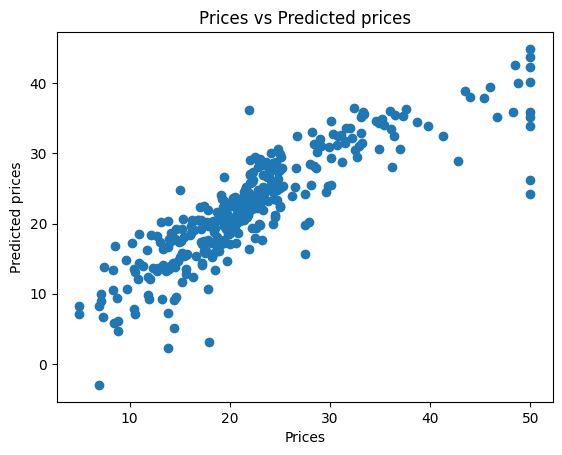

In [ ]:
plt.scatter(Y_train, y_pred)
plt.xlabel('Prices')
plt.ylabel('Predicted prices')
plt.title('Prices vs Predicted prices')

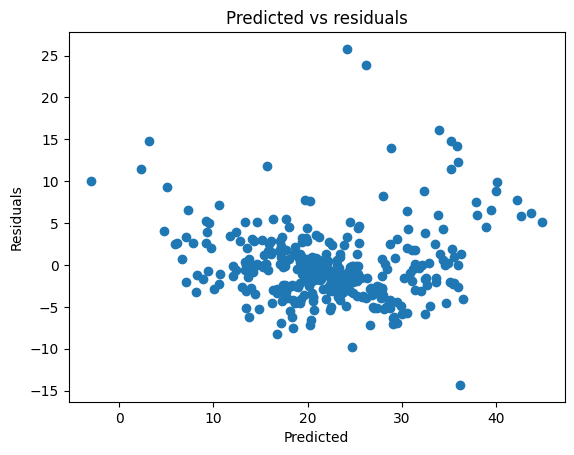

In [ ]:
#this graph all values should try to be close to 0
plt.scatter(y_pred,Y_train-y_pred)
plt.title("Predicted vs residuals")
plt.xlabel("Predicted")
plt.ylabel("Residuals")
plt.show()

<ipython-input-58-b367048255bd>:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(Y_train-y_pred)


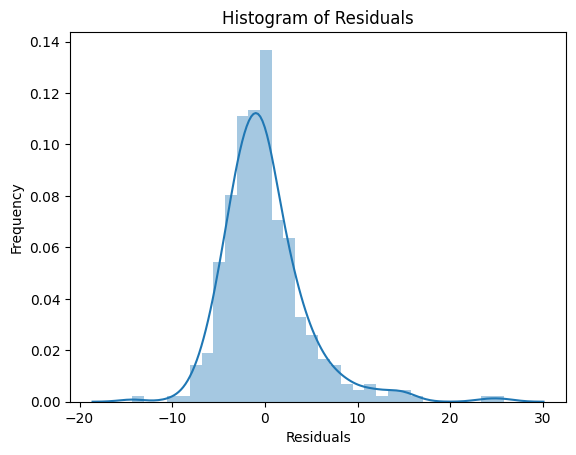

In [ ]:
#checking for the normality of errors
sns.distplot(Y_train-y_pred)
plt.title("Histogram of Residuals")
plt.xlabel("Residuals")
plt.ylabel("Frequency")
plt.show()

###TRYING FOR TEST DATA NOW

In [ ]:
y_test_pred = lm.predict(X_test)

In [ ]:
acc_linreg = metrics.r2_score(Y_test, y_test_pred)
print('R^2:', acc_linreg)
print('Adjusted R^2:',1 - (1-metrics.r2_score(Y_test, y_test_pred))*(len(Y_test)-1)/(len(Y_test)-X_test.shape[1]-1))
print('MAE:',metrics.mean_absolute_error(Y_test, y_test_pred))
print('MSE:',metrics.mean_squared_error(Y_test, y_test_pred))
print('RMSE:',np.sqrt(metrics.mean_squared_error(Y_test, y_test_pred)))

R^2: 0.71854410129507
Adjusted R^2: 0.690824959755948
MAE: 3.650269771938567
MSE: 26.489337441382446
RMSE: 5.146779327053225


Trying out RANDOM FOREST REGRESSOR NOW

In [ ]:
from sklearn.ensemble import RandomForestRegressor
reg = RandomForestRegressor()
reg.fit(X_train, Y_train)

RandomForestRegressor()

In [ ]:
y_pred = reg.predict(X_train)

In [ ]:
print('R^2:',metrics.r2_score(Y_train, y_pred))
print('Adjusted R^2:',1 - (1-metrics.r2_score(Y_train, y_pred))*(len(Y_train)-1)/(len(Y_train)-X_train.shape[1]-1))
print('MAE:',metrics.mean_absolute_error(Y_train, y_pred))
print('MSE:',metrics.mean_squared_error(Y_train, y_pred))
print('RMSE:',np.sqrt(metrics.mean_squared_error(Y_train, y_pred)))

R^2: 0.9737396651348434
Adjusted R^2: 0.9726860097235872
MAE: 0.9374911242603534
MSE: 2.185361869822481
RMSE: 1.4782969491352138


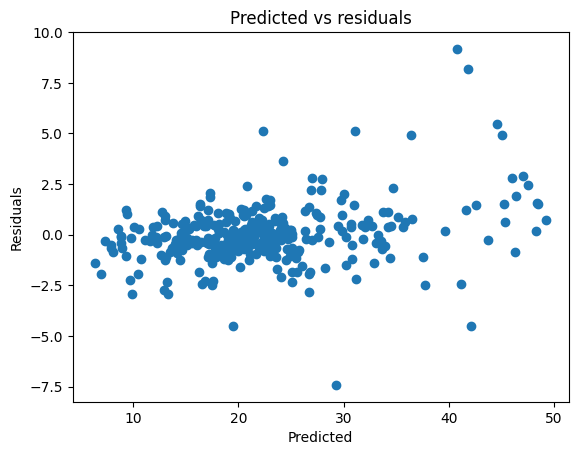

In [ ]:
plt.scatter(y_pred,Y_train-y_pred)
plt.title("Predicted vs residuals")
plt.xlabel("Predicted")
plt.ylabel("Residuals")
plt.show()

Text(0.5, 1.0, 'Prices vs Predicted prices')

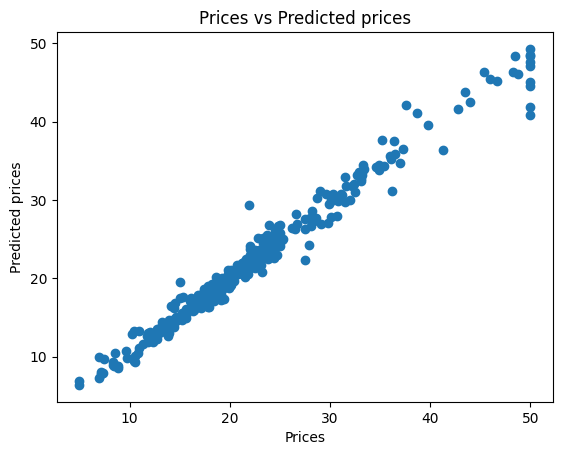

In [ ]:
##EVERYTHING SEEMS ALMOST AROUND THE CENTRE
#lets try precited prices vs prices
plt.scatter(Y_train, y_pred)
plt.xlabel('Prices')
plt.ylabel('Predicted prices')
plt.title('Prices vs Predicted prices')

In [ ]:
y_test_pred = reg.predict(X_test)

In [ ]:
acc_linreg = metrics.r2_score(Y_test, y_test_pred)
print('R^2:', acc_linreg)
print('Adjusted R^2:',1 - (1-metrics.r2_score(Y_test, y_test_pred))*(len(Y_test)-1)/(len(Y_test)-X_test.shape[1]-1))
print('MAE:',metrics.mean_absolute_error(Y_test, y_test_pred))
print('MSE:',metrics.mean_squared_error(Y_test, y_test_pred))
print('RMSE:',np.sqrt(metrics.mean_squared_error(Y_test, y_test_pred)))

R^2: 0.903065445540898
Adjusted R^2: 0.893518860632047
MAE: 2.0673150684931514
MSE: 9.123035383561634
RMSE: 3.02043629026696


In [8]:
from xgboost import XGBRegressor

# Create a XGBoost Regressor
reg = XGBRegressor()

# Train the model using the training sets
reg.fit(X_train, Y_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=None, n_jobs=None,
             num_parallel_tree=None, random_state=None, ...)

In [10]:
y_pred = reg.predict(X_train)

In [11]:
y_test_pred = reg.predict(X_test)

R^2 scores:  0.8810059546810156
MAE measured: 2.268541426201389
MSE measured: 11.199173421034853
RMSE measured: 3.346516610004327


Text(0.5, 1.0, 'Prices vs Predicted prices')

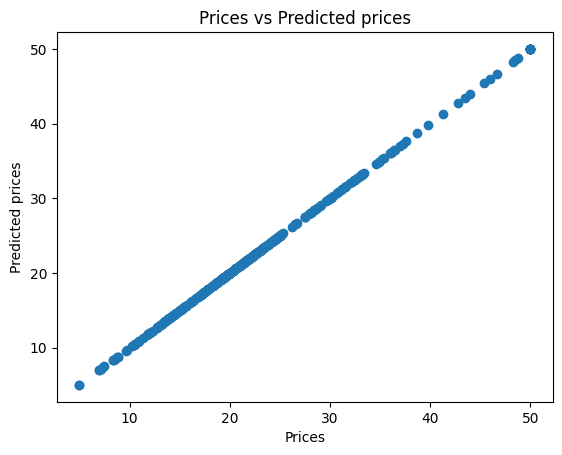

In [12]:
#Printing the metrics
print("R^2 scores: ", metrics.r2_score(Y_test, y_test_pred))
print("MAE measured:", metrics.mean_absolute_error(Y_test, y_test_pred))
print("MSE measured:", metrics.mean_squared_error(Y_test, y_test_pred))
print("RMSE measured:", np.sqrt(metrics.mean_squared_error(Y_test, y_test_pred)))


plt.scatter(Y_train, y_pred)
plt.xlabel('Prices')
plt.ylabel('Predicted prices')
plt.title('Prices vs Predicted prices')